# BIENVENUE!

Bienvenue dans "*** Clustering (Segmentation de Client) Projet ***". 

À la fin de ce projet, vous aurez effectué une *** Cluster Analyse *** avec une méthode de *** apprentissage non supervisé ***.

---

Dans ce projet, les clients doivent être segmentés en fonction de l'historique d'achat obtenu à partir des cartes de membre d'un grand centre commercial.

Après avoir appris à connaître rapidement l'ensemble de données, vous devez effectuer une *** analyse exploratoire des données ***. Vous devez observer la répartition des clients selon différentes variables, découvrir également les relations et les corrélations entre les variables. Ensuite, vous spécifierez les différentes variables à utiliser pour l'analyse de cluster.

Enfin, vous devez regrouper les clients à l'aide de la méthode *** K-Means Clustering ***, après cela étiqueter les clusters.


---
---

# #Tâches


#### 1. Importer les packages, Ouvrir la base de données, Explorer de données
- Importer les packages
- Ouvrir la base de données
- Explorer de données

#### 2. L'analyse exploratoire de données


#### 3. Cluster Analyse

- Clustering basé sur l'âge et le score de dépenses

    *i. Créer un nouvel ensemble de données avec deux variables de votre choix*
    
    *ii. Déterminer le nombre optimal de clusters*
    
    *iii. Appliquer K Means*
    
    *iv. Visualisation et étiquetage de tous les clusters*
    
    
- Clustering basé sur le revenu annulaire et le score de dépenses

    *i. Créer un nouvel ensemble de données avec deux variables de votre choix*
    
    *ii. Determiner le nombre optimal de clusters*
    
    *iii. Appliquer K Means*
    
    *iv. Visualisation et étiquetage de tous les clusters*
    
    
- Clustering Hiérarchique

    *i. Determiner le nombre optimal de clusters à l'aide du Dendogram* 

    *ii. Appliquer le clustering agglomératif*

    *iii. Visualisation et étiquetage de tous les clusters* 

- Conclusion

---
---

## 1. Importer les packages, Ouvrir la base de données, Explorer de données

Il y a un grand centre commercial dans une ville spécifique qui conserve les informations de ses clients qui souscrivent à une carte de membre. Dans la carte d'affiliation, ils fournissent les informations suivantes: sexe, âge et revenu annulaire. Les clients utilisent cette carte de membre pour effectuer tous les achats dans le centre commercial, de sorte que le centre commercial a l'historique des achats de tous les membres abonnés et en fonction de cela, ils calculent le score de dépenses de tous les clients. Vous devez segmenter ces clients en fonction des détails fournis. 

#### Importer les packages

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

#### Ouvrir la base de données

In [2]:
df = pd.read_csv("Mall_Customers.csv",index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


#### Explorer de Données

Vous pouvez renommer les colonnes pour qu'elles soient plus utilisables, si vous en avez besoin.

In [3]:
df.shape

(200, 4)

In [4]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.rename(columns={'Annual Income (k$)':'Income',
                   'Spending Score (1-100)':'Score'},inplace=True)

In [7]:
df.head(2)

,Gender,Age,Income,Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81


---
---

## 2.  L'analyse exploratoire de données

Après avoir effectué l'analyse de cluster, vous devez bien connaître les données afin d'étiqueter correctement les observations. Analysez les distributions de fréquence des caractéristiques, les relations et les corrélations entre les variables indépendantes et la variable dépendante. On recommande d'appliquer des techniques de visualisation des données. L'observation des points d'important vous aide à internaliser les données.





In [8]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:

df.describe(include='all', percentiles=[.1, .25, .5, .75, .95])

,Gender,Age,Income,Score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
10%,NaN,21.000000,23.900000,13.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000


* Les **'outliers'** peuvent être déterminées en comparant les valeurs **min - 10%** et **max - 95%** ci-dessus.

In [10]:
df.groupby('Gender').describe().T

Gender            Female        Male
Age    count  112.000000   88.000000
       mean    38.098214   39.806818
       std     12.644095   15.514812
       min     18.000000   18.000000
       25%     29.000000   27.750000
       50%     35.000000   37.000000
       75%     47.500000   50.500000
       max     68.000000   70.000000
Income count  112.000000   88.000000
       mean    59.250000   62.227273
       std     26.011952   26.638373
       min     16.000000   15.000000
       25%     39.750000   45.500000
       50%     60.000000   62.500000
       75%     77.250000   78.000000
       max    126.000000  137.000000
Score  count  112.000000   88.000000
       mean    51.526786   48.511364
       std     24.114950   27.896770
       min      5.000000    1.000000
       25%     35.000000   24.500000
       50%     50.000000   50.000000
       75%     73.000000   70.000000
       max     99.000000   97.000000

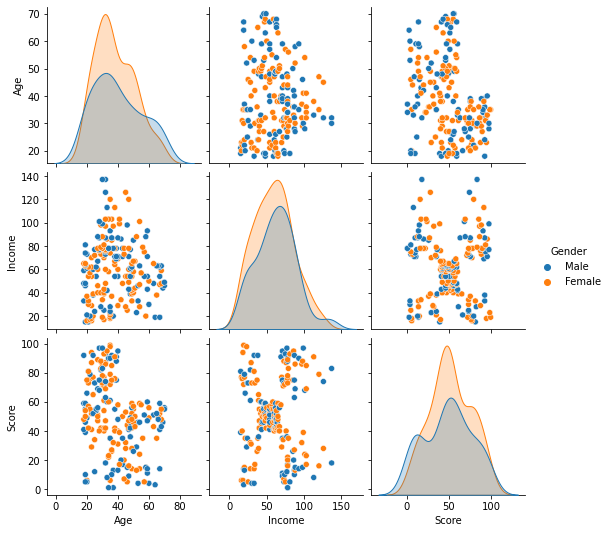

In [11]:
sns.pairplot(df,hue='Gender');

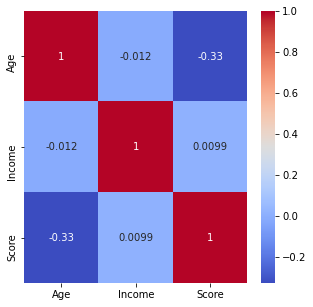

In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

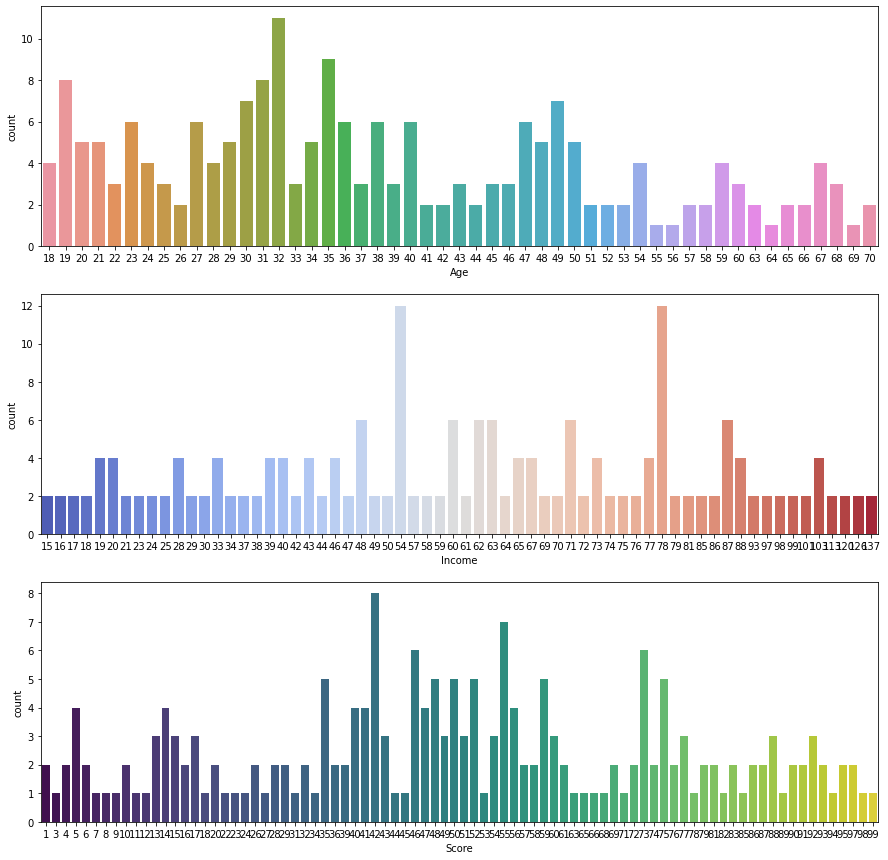

In [13]:
plt.figure(figsize=(15,15))
sns.countplot(x='Income', data=df)

plt.subplot(3,1,1)
sns.countplot(x='Age', data=df)

plt.subplot(3,1,2)
sns.countplot(x='Income', data=df, palette="coolwarm")

plt.subplot(3,1,3)
sns.countplot(x='Score', data=df,palette="viridis")
plt.show()

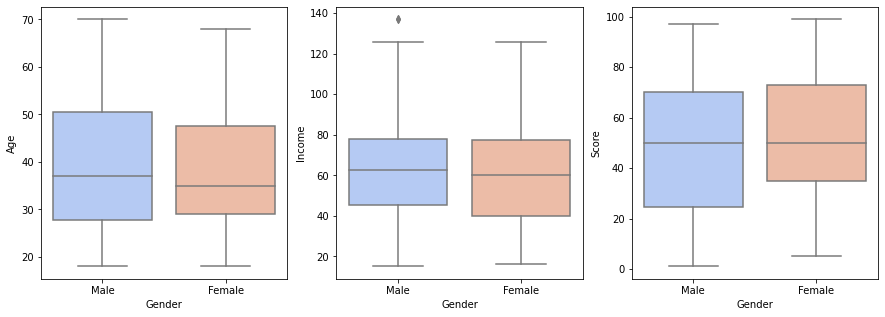

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Gender', y='Age', data=df, palette="coolwarm")

plt.subplot(1,3,2)
sns.boxplot(x='Gender', y='Income', data=df, palette="coolwarm")

plt.subplot(1,3,3)
sns.boxplot(x='Gender', y='Score', data=df, palette="coolwarm")
plt.show()

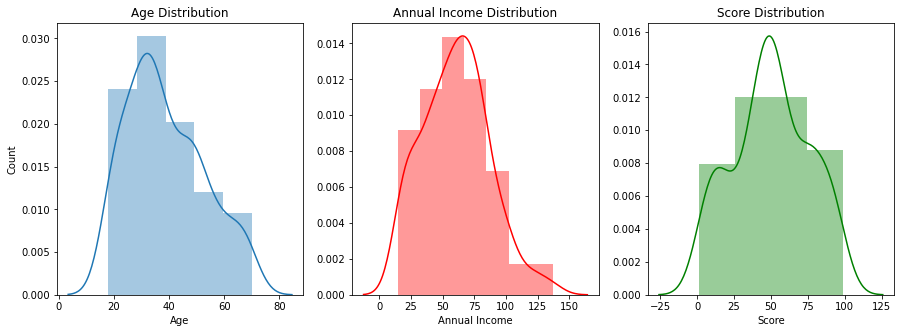

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df.Age,bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.distplot(df['Income'],color='red',bins=7)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('')

plt.subplot(1,3,3)
sns.distplot(df['Score'],color='green',bins=4)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('')
plt.show()

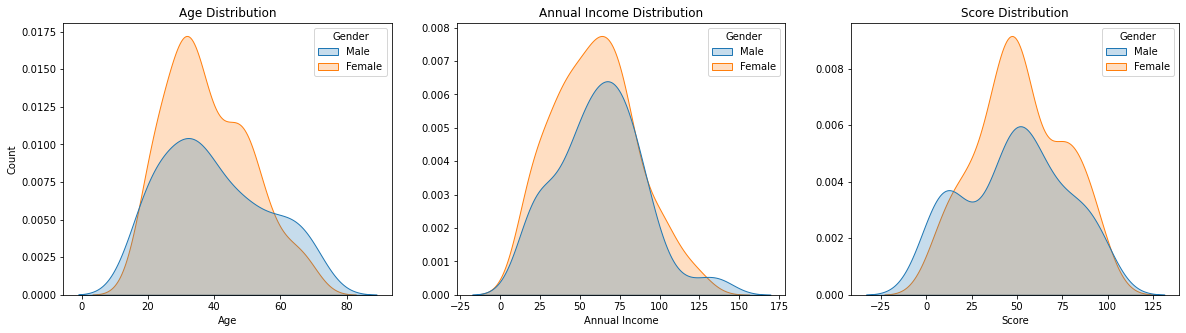

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(x='Age',data=df,hue="Gender",shade=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.kdeplot(x='Income',data=df,hue="Gender",shade=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('')

plt.subplot(1,3,3)
sns.kdeplot(x='Score',data=df,hue="Gender",shade=True)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('')
plt.show()

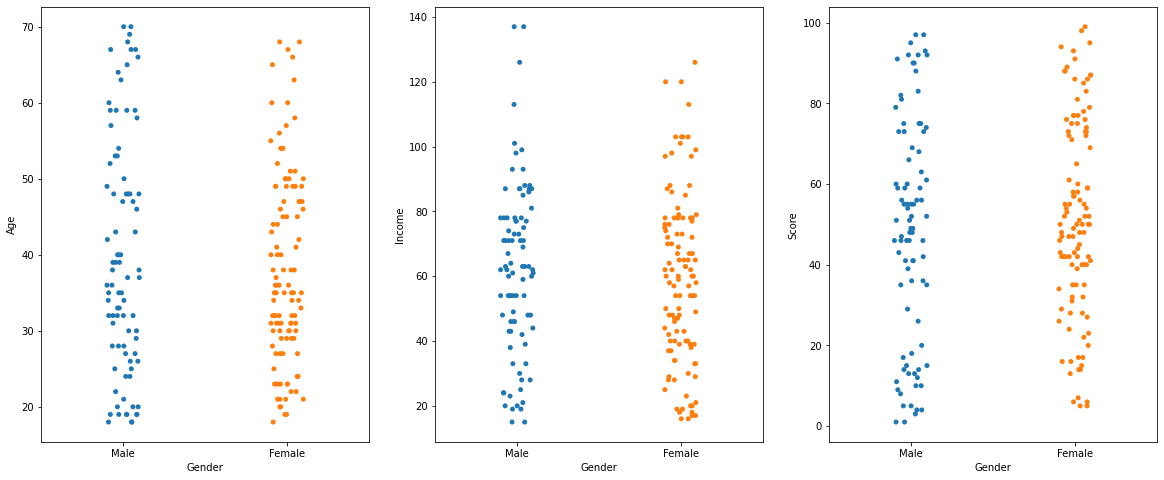

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.stripplot(df['Gender'], df['Age'])

plt.subplot(1,3,2)
sns.stripplot(df['Gender'], df['Income'])

plt.subplot(1,3,3)
sns.stripplot(df['Gender'], df['Score'])
plt.show()

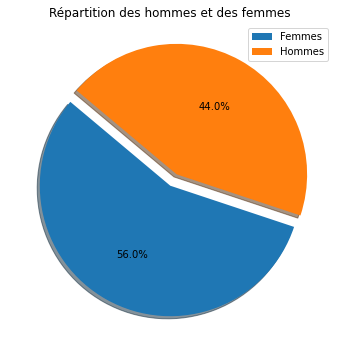

Female    112
Male       88
Name: Gender, dtype: int64

In [18]:
plt.figure(figsize=(6,6))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Femmes','Hommes'])
plt.title('Répartition des hommes et des femmes')
plt.axis('off')
plt.show()

df.Gender.value_counts(dropna=False)

In [19]:
df=pd.get_dummies(df,prefix='',prefix_sep='',drop_first=True)
df.head()

,Age,Income,Score,Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


---
---

## 3. Cluster Analyse

L'objectif principal de ce projet est d'effectuer une analyse de cluster avec l'algorithme K-Means.

Vous pouvez effectuer de nombreuses analyses de cluster en utilisant différentes variables. Si vous utilisez au maximum deux variables pour chaque analyse de cluster, vous pouvez identifier plus clairement les étiquettes de cluster.

Tout d'abord, l'algorithme K-Means s'attend à ce que vous déterminiez le nombre de clusters (*n_clusters*). Vous pouvez déterminer le nombre optimal de clusters pour chaque analyse de cluster de différentes manières. Dans ce cas, vous devez utiliser la méthode du coude.

Enfin, différentes informations sont obtenues dans chaque analyse. Par conséquent, un étiquetage différent doit être effectué à la suite de chaque analyse de cluster.

Exemple d'étiquetage:

- **Clients normaux** - Un consommateur moyen en termes de dépenses et de revenu annulaire
- **Clients dépensiers** - Le revenu annulaire est inférieur mais les dépenses sont élevées, ce qui peut également être considéré comme un client cible potentiel.

### Clustering basé sur l'âge et le score de dépenses

#### *i. Créer un nouvel ensemble de données avec deux variables de votre choix*

In [20]:
df1=df[['Age','Score']]
df1.head(2)

,Age,Score
CustomerID,,
1,19,39
2,21,81


**Hopkins Test**

* Il est basé sur l'hypothèse nulle (Ho) et l'hypothèse alternative (Ha).
* Hypothèse nulle (Ho): distribution uniforme, pas de regroupement significatif.
* Hypothèse alternative (Ha): les données sont constituées de points de données aléatoires. Il y a donc regroupement.
* Il donne un score de [0,1]. Lorsque le score s'approche de 0, les données ne sont pas uniformes, c'est-à-dire qu'elles sont sujettes au clustering.
* Il existe une structure uniforme à l'approche de 1, et elle est exprimée en cluster à moins qu'elle ne dépasse 0,5. En pratique, une limite de 0,3 est prise.

In [21]:
from pyclustertend import hopkins
hopkins(df,df.shape[0])

0.31121498786180246

In [22]:
hopkins(scale(df),df.shape[0])

0.26866264090950853

#### *ii. Déterminer le nombre optimal de clusters*

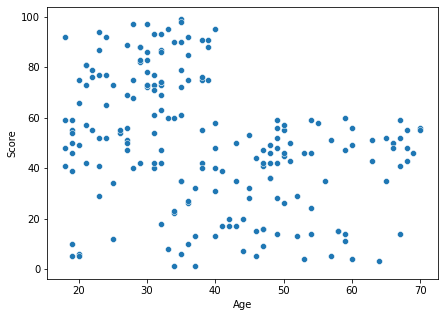

In [64]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age',y='Score',data=df1);

**Trouver la valeur k en fonction du score de silhouette le plus élevé**

**`Score S(Silhouette)`**

* Il est basé sur deux distances pour chaque donnée.
La première de ces distances est la moyenne des distances par rapport aux autres données appartenant au cluster où se trouvent les données.
Le second est la moyenne des distances à toutes les données du cluster voisin le plus proche des données.

* Exprimé par la valeur de S, si s est proche de 1, il a tendance à être un clustering élevé, et s'il est proche de -1, il a tendance à être un clustering faible.

In [24]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4692341232501655
Silhouette Score for 3 clusters: 0.45300127016521263
Silhouette Score for 4 clusters: 0.49973941540141753
Silhouette Score for 5 clusters: 0.45413038593103805
Silhouette Score for 6 clusters: 0.4405479018621985
Silhouette Score for 7 clusters: 0.4212938931368575
Silhouette Score for 8 clusters: 0.43215030177487107
Silhouette Score for 9 clusters: 0.4108237761742933


**k = 4 donne le score S le plus élevé**

**`Score S(Silhouette) avec données mises à l'échelle`**

In [25]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(scale(df1))
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(scale(df1), model.labels_)}')

Silhouette Score for 2 clusters: 0.47212716430695223
Silhouette Score for 3 clusters: 0.4395299000230284
Silhouette Score for 4 clusters: 0.4383860846564479
Silhouette Score for 5 clusters: 0.4236911130700454
Silhouette Score for 6 clusters: 0.45552004739107105
Silhouette Score for 7 clusters: 0.4083850176970476
Silhouette Score for 8 clusters: 0.40877475827440235
Silhouette Score for 9 clusters: 0.44180777228037954


> **Nous avons obtenu le score S le plus élevé avec k = 4. Après la mise à l'échelle, le score S a généralement diminué. nous continuerons avec des données non mises à l'échelle.**

### > **Methode de Coude (Elbow)**

In [26]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df1))
    ssd.append(kmeans.inertia_)

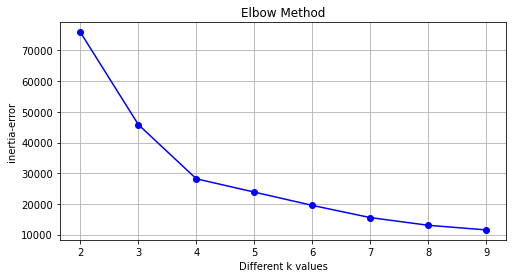

In [27]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

#### *iii. Appliquer K Means*

In [28]:
kmeans = KMeans(n_clusters = 4).fit(df1)
labels = kmeans.labels_

#### *iv. Visualisation et étiquetage de tous les clusters*

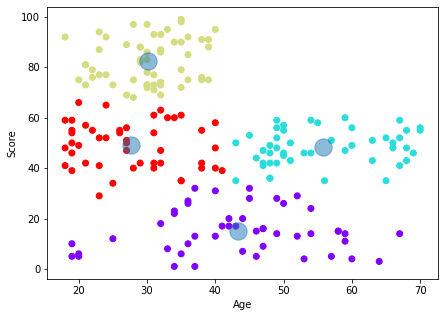

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,alpha=0.5, label = 'Centroids')
plt.xlabel(df1.columns[0])
plt.ylabel(df1.columns[1])
plt.show()

In [30]:
df['Age_Score_Clusters']=labels
df.head(5)

,Age,Income,Score,Male,Age_Score_Clusters
CustomerID,,,,,
1,19,15,39,1,3
2,21,15,81,1,2
3,20,16,6,0,0
4,23,16,77,0,2
5,31,17,40,0,3


### Clustering basé sur le revenu annulaire et le score de dépenses

#### *i. Créer un nouvel ensemble de données avec deux variables de votre choix*

In [31]:
df2=df[['Score','Income']]
df2.head(2)

,Score,Income
CustomerID,,
1,39,15
2,81,15


#### *ii. Determiner le nombre optimal de clusters*

**Trouver la valeur k en fonction du score de silhouette le plus élevé**

**`Score S(Silhouette)`**

* Il est basé sur deux distances pour chaque donnée.
La première de ces distances est la moyenne des distances par rapport aux autres données appartenant au cluster où se trouvent les données.
Le second est la moyenne des distances à toutes les données du cluster voisin le plus proche des données.

* Exprimé par la valeur de S, si s est proche de 1, il a tendance à être un clustering élevé, et s'il est proche de -1, il a tendance à être un clustering faible.

In [32]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, model.labels_)}')

Silhouette Score for 2 clusters: 0.2968969162503008
Silhouette Score for 3 clusters: 0.46761358158775435
Silhouette Score for 4 clusters: 0.4931963109249047
Silhouette Score for 5 clusters: 0.553931997444648
Silhouette Score for 6 clusters: 0.53976103063432
Silhouette Score for 7 clusters: 0.5264283703685728
Silhouette Score for 8 clusters: 0.4566370559752839
Silhouette Score for 9 clusters: 0.4569479922714121


**k = 5 donne le score S le plus élevé**

### > **Méthode Coude (Elbow)**

In [33]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df2))
    ssd.append(kmeans.inertia_)

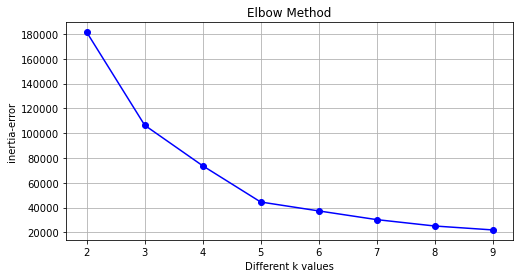

In [34]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

#### *iii. Appliquer K-Means*

In [35]:
kmeans = KMeans(n_clusters = 5).fit(df2)
labels = kmeans.labels_

#### *Visualisation et étiquetage de tous les clusters*

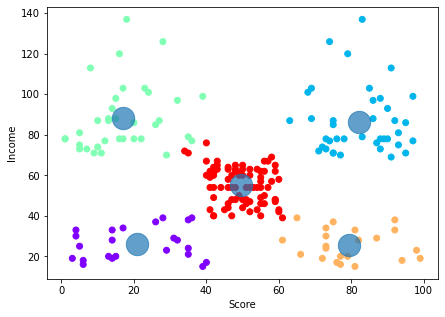

In [36]:
plt.figure(figsize=(7,5))
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,alpha=0.7, label = 'Centroids')
plt.xlabel(df2.columns[0])
plt.ylabel(df2.columns[1])
plt.show()

In [37]:
df['Score_Income_Clusters']=labels
df.head(5)

,Age,Income,Score,Male,Age_Score_Clusters,Score_Income_Clusters
CustomerID,,,,,,
1,19,15,39,1,3,0
2,21,15,81,1,2,3
3,20,16,6,0,0,0
4,23,16,77,0,2,3
5,31,17,40,0,3,0


### Clustering basé sur le revenu annulaire et l'âge

#### *i. Créer un nouvel ensemble de données avec deux variables de votre choix*

In [38]:
df3=df[['Age','Income']]
df3.head(2)

,Age,Income
CustomerID,,
1,19,15
2,21,15


In [39]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df3)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df3, model.labels_)}')

Silhouette Score for 2 clusters: 0.42620850066216065
Silhouette Score for 3 clusters: 0.4254725038202792
Silhouette Score for 4 clusters: 0.43295184273333076
Silhouette Score for 5 clusters: 0.40366620604639963
Silhouette Score for 6 clusters: 0.3962104118856793
Silhouette Score for 7 clusters: 0.3840192204022327
Silhouette Score for 8 clusters: 0.39402130791889556
Silhouette Score for 9 clusters: 0.39161467220173907


**k = 4 donne le score S le plus élevé**

In [40]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df3))
    ssd.append(kmeans.inertia_)

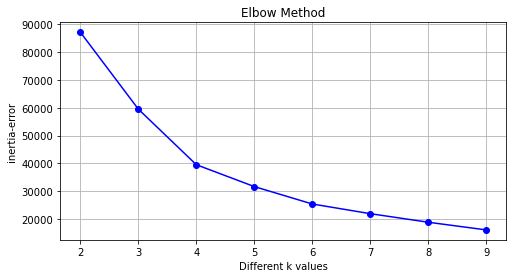

In [41]:
plt.figure(figsize=(8,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

#### *ii. Appliquer K-Means*

In [42]:
kmeans = KMeans(n_clusters = 4).fit(df3)
labels = kmeans.labels_

#### *iii. Visualisation et étiquetage de tous les clusters*

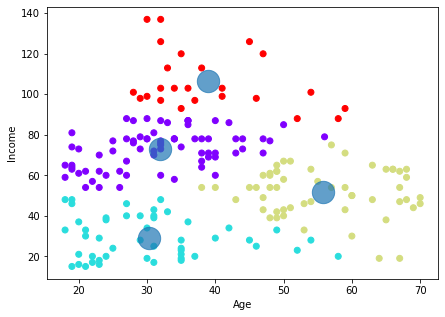

In [43]:
plt.figure(figsize=(7,5))
plt.scatter(df3.iloc[:,0],df2.iloc[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,alpha=0.7, label = 'Centroids')
plt.xlabel(df3.columns[0])
plt.ylabel(df3.columns[1])
plt.show()

In [44]:
df['Age_Income_Clusters']=labels

In [45]:
df.drop(['Age_Score_Clusters','Score_Income_Clusters', 'Age_Income_Clusters'],axis=1,inplace=True)
df_backup=df.copy()

In [46]:
df.drop(['Male'],axis=1,inplace=True)

**“L'algorithme de K-means ne peut pas être directement appliqué aux données catégorielles pour diverses raisons. Pour les données catégorielles, l'échantillon est discret et la distance euclidienne n'est pas significative.”**

### Clustering Hiérarchique

#### *i. Determiner le nombre optimal de clusters à l'aide du Dendogram*

**Clustering Hiérarchique**

In [47]:
# hc_complete =  linkage(df,"complete")
hc_ward = linkage(df, "ward")
# hc_single = linkage(df, "single")

> **`ward`**

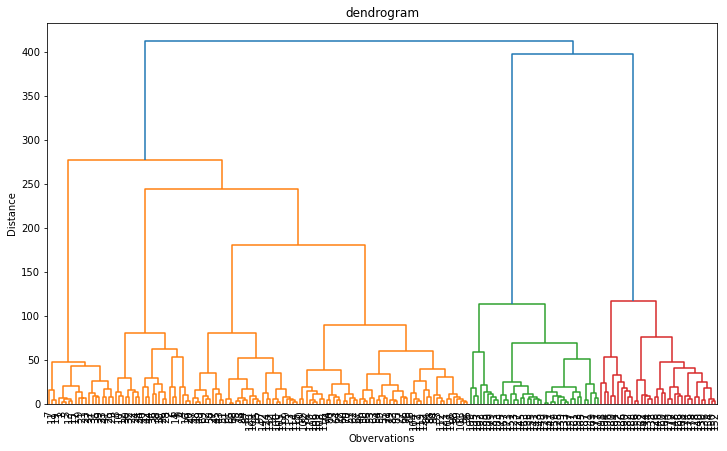

In [48]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

#### ii. *Appliquer le clustering agglomératif*

In [49]:
hc = AgglomerativeClustering(n_clusters = 5,affinity='euclidean',linkage='ward') 
hc.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [50]:
print(f'Silhouette Score(n=5): {silhouette_score(df, hc.labels_)}')

Silhouette Score(n=5): 0.4401889024290193


In [51]:
df["hc_clusters"] = hc.labels_
df.sample(5)

,Age,Income,Score,hc_clusters
CustomerID,,,,
57,51,44,50,0
11,67,19,14,4
108,54,63,46,0
28,35,28,61,0
135,20,73,5,1


In [52]:
df.groupby('hc_clusters').mean()

,Age,Income,Score
hc_clusters,,,
0,42.156627,54.759036,49.771084
1,41.685714,88.228571,17.285714
2,32.692308,86.538462,82.128205
3,24.850000,24.950000,81.000000
4,45.217391,26.304348,20.913043


**`K-Means`**

In [53]:
kmeans = KMeans(n_clusters = 5).fit(df[['Age', 'Income', 'Score']])
kmeans.fit_predict(df[['Age', 'Income', 'Score']])
labels = kmeans.labels_
df["kmeans_clusters"] = labels

In [54]:
df.groupby('kmeans_clusters').mean()

,Age,Income,Score,hc_clusters
kmeans_clusters,,,,
0,32.692308,86.538462,82.128205,2.000000
1,45.217391,26.304348,20.913043,4.000000
2,40.666667,87.750000,17.583333,0.944444
3,25.521739,26.304348,78.565217,2.608696
4,43.088608,55.291139,49.569620,0.012658


 **K_Means vs CH(Clustering Hiérarchique)**

In [55]:
pd.crosstab(df.kmeans_clusters,df.hc_clusters)

hc_clusters,0,1,2,3,4
kmeans_clusters,,,,,
0,0,0,39,0,0
1,0,0,0,0,23
2,2,34,0,0,0
3,3,0,0,20,0
4,78,1,0,0,0


#### iii. *Visualisation et étiquetage de tous les clusters* 

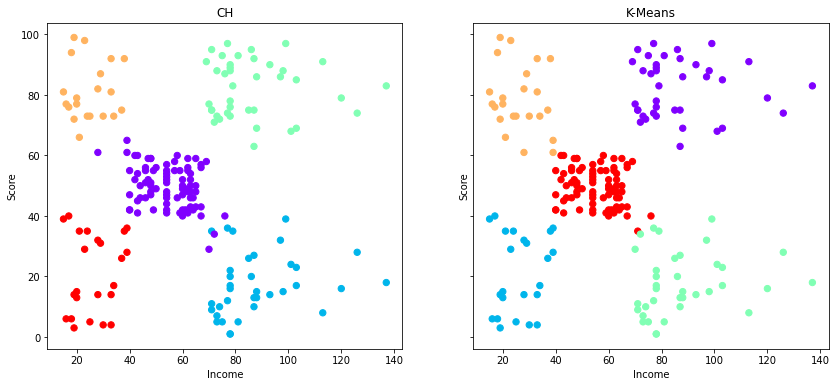

In [65]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6)) # sharey=True ile y eksen labels lari ortak kullanirlar.
ax1.set_title('CH')
ax1.set_xlabel('Income')
ax1.set_ylabel('Score')
ax1.scatter(df.iloc[:,1], df.iloc[:,2], c = df.hc_clusters, s = 40, cmap = "rainbow") # s=40 ,dot size
ax2.set_title("K-Means")
ax2.set_xlabel('Income')
ax2.set_ylabel('Score')
ax2.scatter(df.iloc[:,1], df.iloc[:,2], c = df.kmeans_clusters, s = 40, cmap = "rainbow");

In [66]:
# HC Clustering
silhouette_score(df.drop(['kmeans_clusters','hc_clusters'],axis=1), hc.fit_predict(df))

0.4401889024290193

In [58]:
# K-Means Clustering
silhouette_score(df.drop(['kmeans_clusters','hc_clusters'],axis=1), kmeans.fit_predict(df))

0.44428597560893024

> **Nous pouvons dire que le modèle de clustering K-means est plus efficace. Son score S est supérieur à CH**

**Visualization des Clusters en 3D**

In [59]:
from mpl_toolkits.mplot3d import Axes3D

kmeans= KMeans(n_clusters=5).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

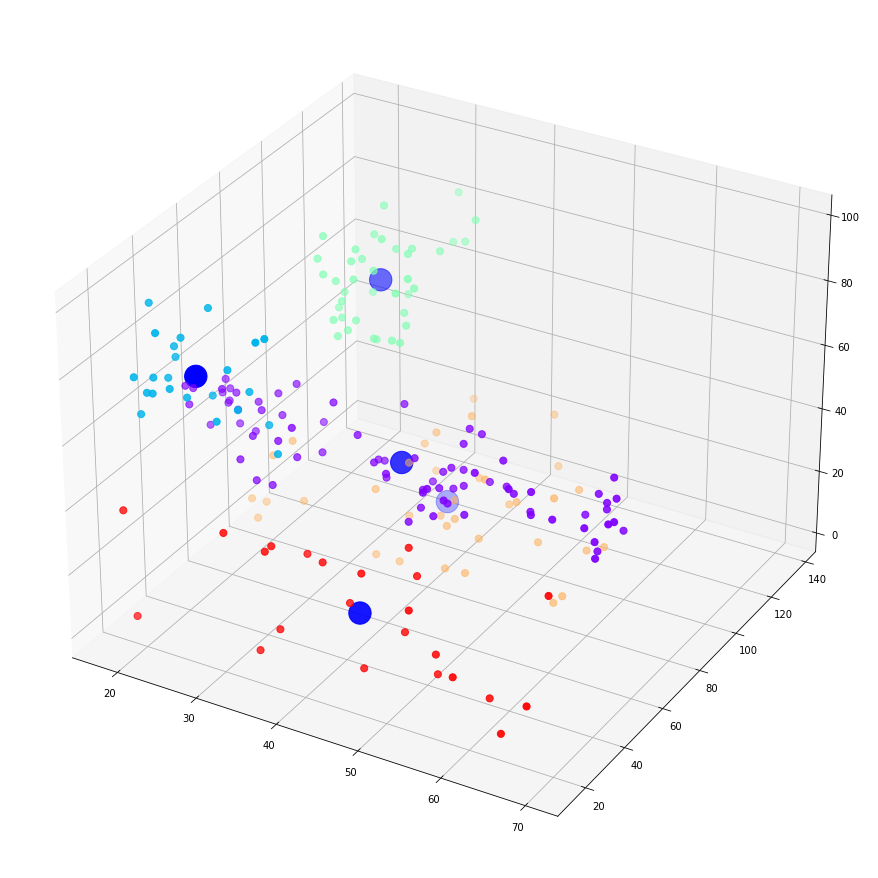

In [60]:
plt.rcParams["figure.figsize"] =(12,12)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "rainbow")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="blue",marker="o",s = 500);

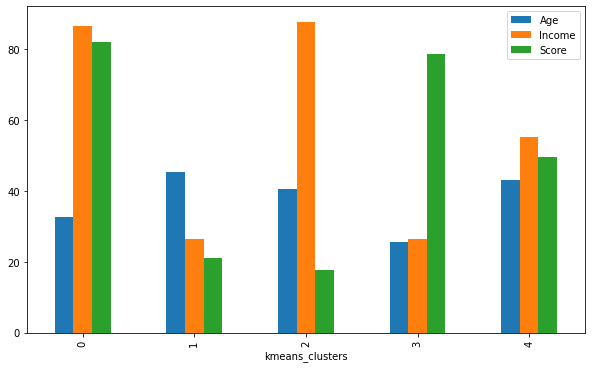

In [61]:
df.drop(['kmeans_clusters','hc_clusters'],axis=1).groupby(df.kmeans_clusters).mean().plot(figsize = (10,6), kind='bar')
plt.show()

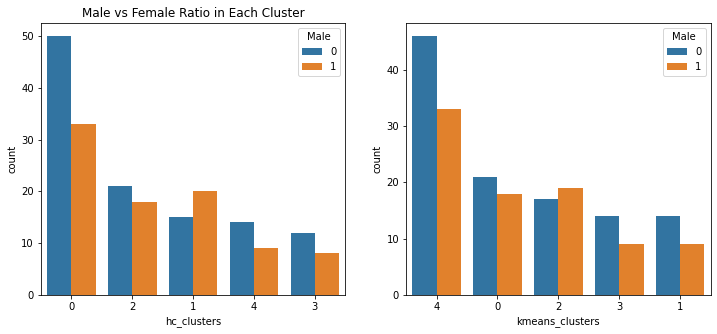

In [62]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='hc_clusters', data=df.merge(df_backup), hue='Male',order = df['hc_clusters'].value_counts().index)
plt.title("Male vs Female Ratio in Each Cluster")

plt.subplot(1,2,2)
sns.countplot(x='kmeans_clusters', data=df.merge(df_backup), hue='Male', order = df['kmeans_clusters'].value_counts().index)
plt.show()

### Conclusion

**1er groupe (Orange):** faible revenu, faible score de dépenses
* Des campagnes de réduction attrayantes peuvent être faites pour chaque personne.

**2e groupe (Vert):** revenu élevé, faible score de dépenses
* Les chèques-cadeaux peuvent être offerts à ceux qui atteignent un certain objectif de dépenses mensuelles.

**3e groupe (Bleu):** revenu modéré, score de dépenses modéré
* La chance de participer à la loterie peut être donnée pour chaque achat.

**4e groupe (Rouge):** faible revenu, score de dépenses élevé
* La carte de membre peut être donnée pour fidéliser les clients.

**5e groupe (Violet):** revenu élevé, score de dépenses élevé
* La carte de membre peut être donnée pour fidéliser les clients.